<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_08_Niet_stationaire_tijdsreeksen_opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Niet stationaire tijdsreeksen opgave


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
# %matplotlib inline
# plt.style.use('seaborn')
# sns.set_style("darkgrid")

## <span style="color:deeppink"> CO<sup>2</sup> uitstoot </span>

De dataset CO<sup>2 </sup> bevat historische gegevens van de wereldwijde CO<sup>2 </sup>  uitstoot, die mede verantwoordelijk zou zijn voor de opwarming van de aarde. De uitstoot wordt gegeven in Gigaton (miljard ton = duizend miljard kilogram).

Laad het bestand `CO2.csv` in als de dataset, gebruik de kolom jaar als de index kolom

In [2]:
dataset = pd.read_csv('CO2.csv', index_col=0)
dataset.head()

,Uitstoot CO2 (Gigaton)
Jaar,
1975,15.54
1976,16.37
1977,16.93
1978,17.44
1979,17.96


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'Uitstoot (Gigaton)')

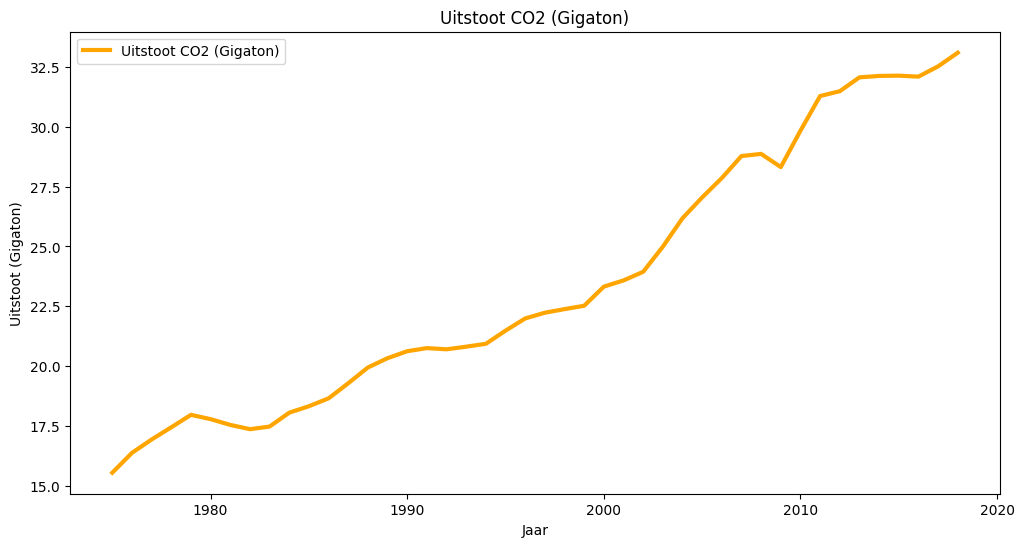

In [3]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Uitstoot CO2 (Gigaton)')
plt.xlabel("Jaar")
plt.ylabel("Uitstoot (Gigaton)")

Ga na of er een lineaire trend aanwezig is en of deze dat al dan niet stationair is.

In [4]:
from sklearn import datasets, linear_model
x = dataset.index.values
y = dataset['Uitstoot CO2 (Gigaton)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = -809.6158985200843
Richtingscoëfficiënt =  0.4172762508809019


### **Wat deze code doet:**

1. **Importeren van Noodzakelijke Bibliotheken:**

   ```python
   from sklearn import datasets, linear_model
   ```

   * Importeert de **datasets** en **linear\_model** modules uit **scikit-learn** voor lineaire regressie.

---

2. **Data Voorbereiden:**

   ```python
   x = dataset.index.values
   y = dataset['Uitstoot CO2 (Gigaton)'].values
   ```

   * **x**: Gebruikt de **index** van het dataset als onafhankelijke variabele (**tijd** of **jaar**).
   * **y**: Gebruikt de **CO2-uitstoot** als afhankelijke variabele.

---

3. **Model Aanmaken:**

   ```python
   regressionline = linear_model.LinearRegression()
   ```

   * Maakt een **lineair regressiemodel** aan.
   * **LinearRegression()** is een **machine learning model** dat een **rechte lijn** probeert te vinden die het beste past bij de gegeven data.

---

4. **Model Trainen (Fitten):**

   ```python
   regressionline.fit(x.reshape(-1,1), y)
   ```

   * **Past** de **index** (x) en **CO2-uitstoot** (y) aan het regressiemodel aan.
   * **`.reshape(-1,1)`** zet **x** om in een **2D-array** omdat de **fit** methode dit verwacht voor enkelvoudige lineaire regressie.

---

5. **Intercept en Richtingscoëfficiënt Printen:**

   ```python
   print('Intercept =', regressionline.intercept_)
   print('Richtingscoëfficiënt = ', regressionline.coef_[0])
   ```

   * **Intercept**: De **y-waarde** waar de lijn de y-as snijdt (beginpunt).
   * **Richtingscoëfficiënt**: De **helling** van de lijn (hoeveel de y-waarde verandert bij een toename van 1 in x).

---


Text(0, 0.5, 'Uitstoot (Gigaton)')

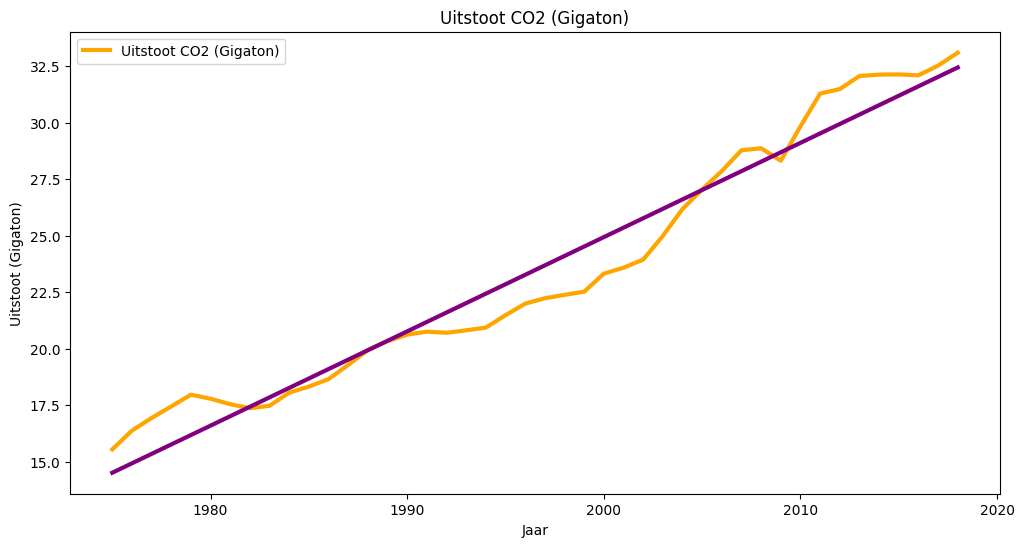

In [5]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
plt.title('Uitstoot CO2 (Gigaton)')
plt.xlabel("Jaar")
plt.ylabel("Uitstoot (Gigaton)")

Verwijder de trend uit de data zodat je de residuen bekomt.

In [6]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn
Jaar,,
1975,15.54,14.504697
1976,16.37,14.921973
1977,16.93,15.339249
1978,17.44,15.756526
1979,17.96,16.173802


In [7]:
dataset['residuen'] =dataset['Uitstoot CO2 (Gigaton)'] - dataset['trendlijn']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen
Jaar,,,
1975,15.54,14.504697,1.035303
1976,16.37,14.921973,1.448027
1977,16.93,15.339249,1.590751
1978,17.44,15.756526,1.683474
1979,17.96,16.173802,1.786198


### **Wat deze code doet:**

---

1. **Trendlijn Toevoegen aan Dataset:**

   ```python
   dataset['trendlijn'] = dataset.index * regressionline.coef_[0] + regressionline.intercept_
   ```

   * **Berekening van de trendlijn:**

     * Vermenigvuldigt de **index** van het **dataset** met de **richtingscoëfficiënt** van de regressielijn.
     * Voegt de **intercept** toe om de **trendlijn** te berekenen voor elke rij.
   * **Toevoegen aan dataset:**

     * Slaat deze waarden op in een nieuwe kolom **'trendlijn'**.

---

2. **Dataset Bekijken:**

   ```python
   dataset.head()
   ```

   * Toont de **eerste 5 rijen** van het dataset met de toegevoegde **'trendlijn'** kolom.

---

3. **Residuen Berekenen:**

   ```python
   dataset['residuen'] = dataset['Uitstoot CO2 (Gigaton)'] - dataset['trendlijn']
   ```

   * **Residuen**: Het verschil tussen de **werkelijke CO2-uitstoot** en de **verwachte waarde** van de **trendlijn**.
   * Dit meet hoe goed het model de werkelijke waarden benadert (hoe groot de fouten zijn).

---

4. **Dataset Bekijken (Opnieuw):**

   ```python
   dataset.head()
   ```

   * Toont opnieuw de **eerste 5 rijen** om te controleren of de **'residuen'** kolom correct is toegevoegd.

---

### **Kort samengevat:**

* **Voegt** een **trendlijn** toe aan het dataset.
* **Bereken** de **residuen** (fouten) tussen de **werkelijke** en **voorspelde** waarden.
* **Controleert** of beide kolommen correct zijn toegevoegd. 😊


Maak een plot van de residuen en controleer of de residuen stationair zijn via het toevoegen van een trendlijn

In [8]:
x = dataset.index.values
y = dataset['residuen'].values
regressionline1 = linear_model.LinearRegression()
regressionline1.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline1.intercept_ )
print('Richtingscoëfficiënt = ', regressionline1.coef_[0])

Intercept = 2.7261164313428573e-13
Richtingscoëfficiënt =  -1.3444176384366897e-16


<Axes: xlabel='Jaar'>

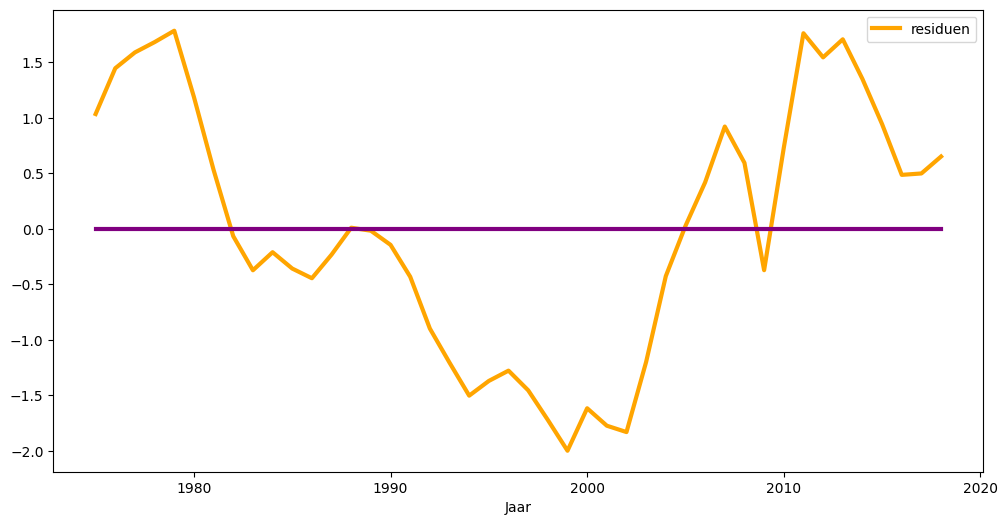

In [9]:
dataset['residuen'].plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline1.predict(x.reshape(-1,1)),color='purple',linewidth=3)

### **Wat deze code doet:**

---

1. **Data Voorbereiden:**

   ```python
   x = dataset.index.values
   y = dataset['residuen'].values
   ```

   * **x**: De **index** van het dataset (meestal tijd).
   * **y**: De **residuen** (verschillen tussen de werkelijke waarden en de voorspelde trendlijn).

---

2. **Lineaire Regressie op Residuen:**

   ```python
   regressionline1 = linear_model.LinearRegression()
   regressionline1.fit(x.reshape(-1,1), y)
   ```

   * **Maakt** een nieuw lineair regressiemodel (**regressionline1**).
   * **Past** het model aan de residuen aan om te kijken of er nog een **trend** in de fouten zit.
   * **`.reshape(-1,1)`** maakt van **x** een **2D-array** voor de regressie.

---

3. **Intercept en Richtingscoëfficiënt Printen:**

   ```python
   print('Intercept =', regressionline1.intercept_)
   print('Richtingscoëfficiënt = ', regressionline1.coef_[0])
   ```

   * **Print** de **intercept** (startpunt) en **helling** (richtingscoëfficiënt) van de residu-regressielijn.

---

4. **Visualiseren van de Residuen en Regressielijn:**

   ```python
   dataset['residuen'].plot(color='orange', linewidth=3, figsize=(12,6))
   sns.lineplot(x=x, y=regressionline1.predict(x.reshape(-1,1)), color='purple', linewidth=3)
   ```

   * **Plot** de residuen als een **oranje lijn**.
   * **Voegt** de voorspelde regressielijn toe als een **paarse lijn**.
   * Laat zien of er nog een **trend** of **systeematische afwijking** in de fouten zit.

---

### **Kort samengevat:**

* **Fit** een nieuwe regressielijn op de **residuen** om te zien of er nog een **trend** in de fouten zit.
* **Visualiseert** zowel de residuen als de bijbehorende **regressielijn**. 😊


Gebruik moving average en exponentiële demping om het residu van 2019 te voorspellen. Voorspel ook eenvoudigweg op basis van de trendlijn. Zoek de optimale alpha wanneer je gebruik maakt van exponentiele demping. Kies de beste voorspellingsmethode op basis van de MAE (Mean Average Error).

In [10]:
dataset['5MA'] = dataset['residuen'].rolling(5).mean().shift()
dataset['absolute fout 5MA'] = abs(dataset['residuen']- dataset['5MA'])
print("Mean absolute error 5MA: ", dataset['absolute fout 5MA'].mean())
dataset['procentuele fout 5MA'] = abs(dataset['absolute fout 5MA']/dataset['residuen']*100)
dataset.head(10)

Mean absolute error 5MA:  0.6497040711226827


,Uitstoot CO2 (Gigaton),trendlijn,residuen,5MA,absolute fout 5MA,procentuele fout 5MA
Jaar,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,NaN,NaN,NaN
1977,16.93,15.339249,1.590751,NaN,NaN,NaN
1978,17.44,15.756526,1.683474,NaN,NaN,NaN
1979,17.96,16.173802,1.786198,NaN,NaN,NaN
1980,17.78,16.591078,1.188922,1.508751,0.319829,26.900740
1981,17.54,17.008354,0.531646,1.539474,1.007829,189.567805
1982,17.36,17.425631,-0.065631,1.356198,1.421829,2166.407173
1983,17.47,17.842907,-0.372907,1.024922,1.397829,374.846501


### **Wat deze code doet:**

---

1. **5-Punts Voortschrijdend Gemiddelde:**

   ```python
   dataset['5MA'] = dataset['residuen'].rolling(5).mean().shift()
   ```

   * **Bereken** een **voortschrijdend gemiddelde** over **5** waarden in de **'residuen'** kolom.
   * **.shift()** verschuift het gemiddelde met **1 positie** zodat je alleen naar eerdere waarden kijkt.

---

2. **Absolute Fout voor 5MA:**

   ```python
   dataset['absolute fout 5MA'] = abs(dataset['residuen'] - dataset['5MA'])
   ```

   * **Meet** de **absolute fout** tussen de residuen en het 5-punts gemiddelde.

---

3. **Gemiddelde Absolute Fout Printen:**

   ```python
   print("Mean absolute error 5MA: ", dataset['absolute fout 5MA'].mean())
   ```

   * **Print** de **gemiddelde absolute fout** voor de **5MA**.

---

4. **Procentuele Fout voor 5MA:**

   ```python
   dataset['procentuele fout 5MA'] = abs(dataset['absolute fout 5MA'] / dataset['residuen'] * 100)
   ```

   * **Bereken** de **procentuele fout** voor elke waarde in de residuen.

---

5. **Eerste 10 Rijen Bekijken:**

   ```python
   dataset.head(10)
   ```

   * **Toont** de **eerste 10 rijen** van het dataset om te controleren of de berekeningen correct zijn.

---

### **Kort samengevat:**

* **Voegt** een 5-punts voortschrijdend gemiddelde toe.
* **Meet** de absolute en procentuele fouten.
* **Print** het gemiddelde van deze fouten. 😊


Voeg de trend opnieuw toe aan de beste voorspelling

In [12]:
step = 1e-4
alphas = np.arange(start=0, stop=1+step, step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    exponential = []
    exponential = dataset['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['residuen'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
print("index: ", df[df['mae'] == minimum_mae].index[0])

The alpha with the lowest MAE is:  0.34353090122425756 index: 
index:  1.0


### **Wat deze code doet:**

---

1. **Alpha Waarden Genereren:**

   ```python
   step = 1e-4
   alphas = np.arange(start=0, stop=1+step, step=step)
   ```

   * **Maakt** een reeks alpha-waarden van **0** tot **1** met een **stapgrootte** van **0.0001**.
   * Deze alpha's worden gebruikt voor **exponentiële demping**.

---

2. **DataFrame voor MAE:**

   ```python
   df = pd.DataFrame()
   mae = []
   ```

   * **Maakt** een leeg DataFrame om de **MAE**-waarden op te slaan.
   * **Initialiseert** een lege lijst voor de MAE's.

---

3. **MAE Berekenen voor Elke Alpha:**

   ```python
   for alpha in alphas[1:]:
       exponential = dataset['residuen'].ewm(alpha=alpha, adjust=False).mean().shift(1)
       mae.append(abs(dataset['residuen'] - exponential).mean())
   ```

   * **Itereert** over elke **alpha** (behalve 0).
   * Bereken de **exponentiële demping** van de **residuen** met die alpha.
   * **Shift** de waarden met **1** om te voorkomen dat je huidige waarden gebruikt.
   * **Meet** de gemiddelde absolute fout (MAE) en voeg deze toe aan de lijst.

---

4. **MAE's Opslaan in DataFrame:**

   ```python
   df['mae'] = mae
   df.set_index(alphas[1:], inplace=True)
   df.index.name = 'Alpha'
   ```

   * **Sla** de MAE-waarden op in het DataFrame met de alpha's als index.
   * **Label** de index als **Alpha**.

---

5. **Minimum MAE Printen:**

   ```python
   minimum_mae = df['mae'].min()
   print("The alpha with the lowest MAE is: ", minimum_mae, "index: ")
   print("index: ", df[df['mae'] == minimum_mae].index[0])
   ```

   * **Zoek** de kleinste MAE-waarde en **print** deze.
   * **Print** ook de alpha die deze minimum MAE oplevert.

---

### **Kort samengevat:**

* **Test** verschillende alpha-waarden voor **exponentiële demping**.
* **Bereken** de MAE voor elke alpha.
* **Vind** de **alpha** met de laagste MAE en **print** die. 😊


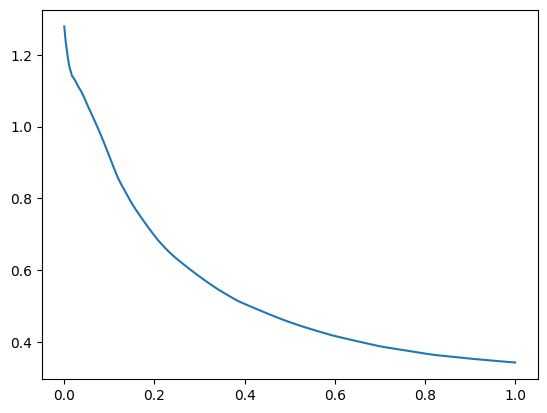

In [13]:
plt.plot(df['mae'])

In [14]:
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=1, adjust=False).mean().shift(1)
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
print("Mean absolute error exponentiele demping: ", dataset['absolute fout exponentiele demping'].mean())
dataset.head()

Mean absolute error exponentiele demping:  0.34353090122425756


,Uitstoot CO2 (Gigaton),trendlijn,residuen,5MA,absolute fout 5MA,procentuele fout 5MA,exponentiele demping,absolute fout exponentiele demping
Jaar,,,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,NaN,NaN,NaN,1.035303,0.412724
1977,16.93,15.339249,1.590751,NaN,NaN,NaN,1.448027,0.142724
1978,17.44,15.756526,1.683474,NaN,NaN,NaN,1.590751,0.092724
1979,17.96,16.173802,1.786198,NaN,NaN,NaN,1.683474,0.102724


In [15]:
dataset['voorspelling'] = dataset['exponentiele demping'] + dataset['trendlijn']
dataset.head()

,Uitstoot CO2 (Gigaton),trendlijn,residuen,5MA,absolute fout 5MA,procentuele fout 5MA,exponentiele demping,absolute fout exponentiele demping,voorspelling
Jaar,,,,,,,,,
1975,15.54,14.504697,1.035303,NaN,NaN,NaN,NaN,NaN,NaN
1976,16.37,14.921973,1.448027,NaN,NaN,NaN,1.035303,0.412724,15.957276
1977,16.93,15.339249,1.590751,NaN,NaN,NaN,1.448027,0.142724,16.787276
1978,17.44,15.756526,1.683474,NaN,NaN,NaN,1.590751,0.092724,17.347276
1979,17.96,16.173802,1.786198,NaN,NaN,NaN,1.683474,0.102724,17.857276


### **Wat deze code doet:**

---

1. **Exponentiële Demping Berekenen:**

   ```python
   dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=1, adjust=False).mean().shift(1)
   ```

   * **Maakt** een nieuwe kolom **'exponentiele demping'** met een **exponentieel gewogen gemiddelde** van de **residuen**.
   * **Alpha=1** betekent dat de **laatste waarneming** volledig wordt gebruikt (geen demping).
   * **Shift(1)** verschuift de waarden zodat je alleen **verleden** gebruikt voor voorspellingen.

---

2. **Absolute Fout voor Exponentiële Demping:**

   ```python
   dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
   print("Mean absolute error exponentiele demping: ", dataset['absolute fout exponentiele demping'].mean())
   ```

   * **Bereken** de **absolute fout** tussen de werkelijke **residuen** en de **exponentiële demping**.
   * **Print** de gemiddelde absolute fout (MAE).

---

3. **Voorspellingen Toevoegen:**

   ```python
   dataset['voorspelling'] = dataset['exponentiele demping'] + dataset['trendlijn']
   ```

   * **Combineert** de **exponentiële demping** en de **trendlijn** om de **totale voorspelling** te berekenen.
   * Dit is de **gecorrigeerde voorspelling** inclusief **trend** en **residuen**.

---

4. **Dataset Bekijken:**

   ```python
   dataset.head()
   ```

   * **Toont** de eerste 5 rijen van het dataset om te controleren of de nieuwe kolommen correct zijn toegevoegd.

---

### **Kort samengevat:**

* **Bereken** een exponentieel gewogen gemiddelde van de residuen.
* **Voeg** dit toe aan de trendlijn om de **totale voorspelling** te krijgen.
* **Controleer** of de nieuwe kolommen correct zijn toegevoegd. 😊


Maak een grafiek van de tijdreeks samen met de voorspellingslijn.

Text(0, 0.5, 'Uitstoot (Gigaton)')

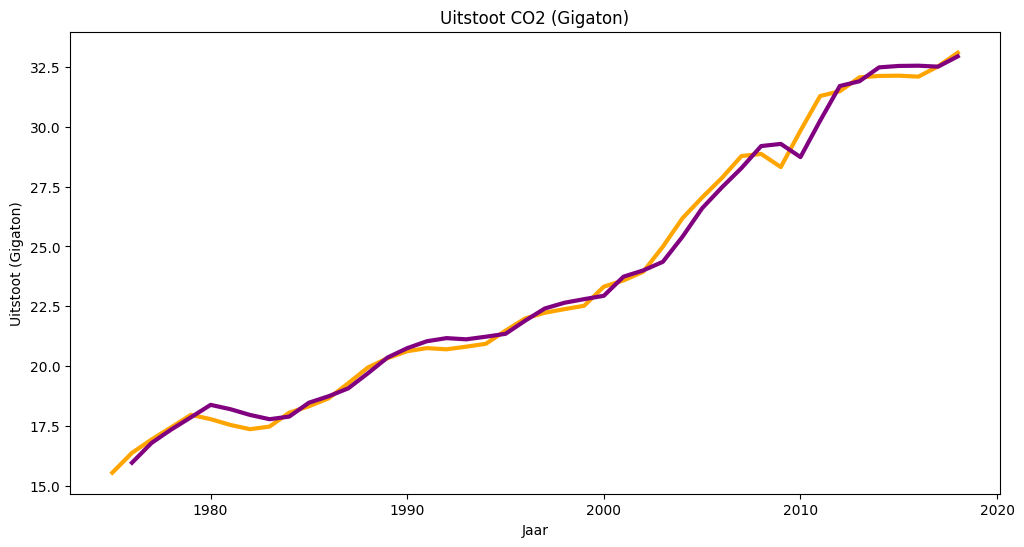

In [16]:
dataset['Uitstoot CO2 (Gigaton)'].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['voorspelling'].plot(color='purple', linewidth=3)
plt.title('Uitstoot CO2 (Gigaton)')
plt.xlabel("Jaar")
plt.ylabel("Uitstoot (Gigaton)")

## <span style="color:deeppink"> alcohol sales </span>
De winst op verkoop van alcohol stijgt jaar na jaar. In het tabblad alcohol sales kan je de verkoop per maand zien sinds 1992 in miljoen dollar. (bron: https://fred.stlouisfed.org/series/S4248SM144NCEN#0)

Lees het bestand `alcohol sales.csv` in, gebruik de eerste kolom als index



In [17]:
dataset = pd.read_csv('alcohol sales.csv', index_col=0)
dataset.head()

,date,Month,sales (million dollar)
id,,,
0,1/01/1992,January,3459
1,1/02/1992,February,3458
2,1/03/1992,March,4002
3,1/04/1992,April,4564
4,1/05/1992,May,4221


Maak een grafiek van deze tijdreeks

Text(0, 0.5, 'sales (million dollar)')

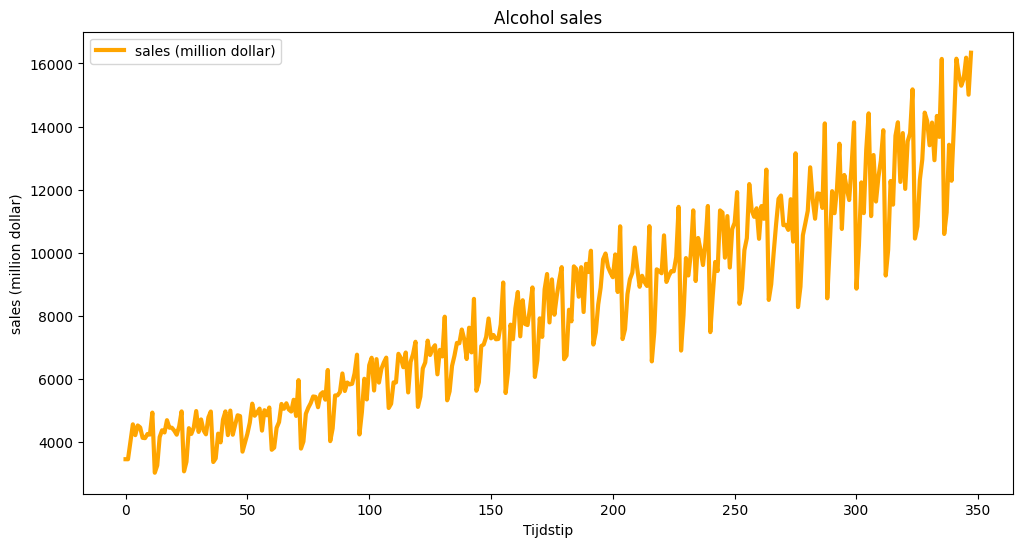

In [18]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Alcohol sales')
plt.xlabel("Tijdstip")
plt.ylabel("sales (million dollar)")

Bepaal de trend in de tijdreeks en geef de vergelijking ervan.

Gebruik seizoensregressie om een voorspelling van de sales van elke maand in 2021 te doen.
1.	Verwijder eerst de trend.
2.	Bepaal het gemiddelde van de residuen van elke maand.
3.	Voorspel het aantal verkopen van elke maand aan de hand van seizoensregressie.
4.	Wat is de MAE?


In [20]:
x = dataset.index.values
y = dataset['sales (million dollar)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 3089.042502387776
Richtingscoëfficiënt =  29.733465983786378


<Axes: xlabel='id'>

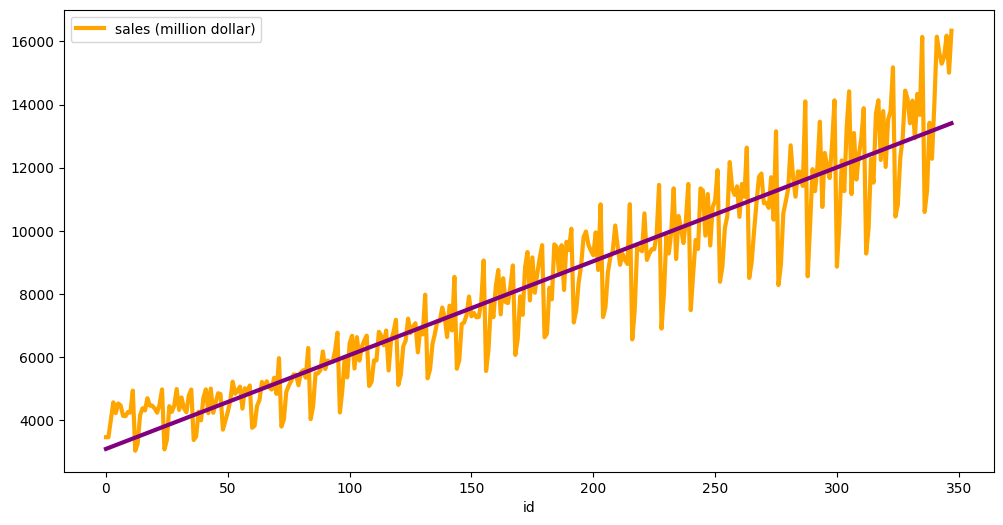

In [21]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [22]:
dataset['trendlijn'] = regressionline.coef_[0]*dataset.index + regressionline.intercept_
dataset['residuen'] = dataset['sales (million dollar)'] - dataset['trendlijn']

In [23]:
# 2. Bepaal het gemiddelde van de residuen van elke maand.
df = dataset.groupby(['Month'])['residuen'].mean()
df

,residuen
Month,
April,-283.465186
August,436.980261
December,1377.494673
February,-1383.756874
January,-1874.437201
July,23.299934
June,902.723055
March,-199.007582
May,523.904797


In [25]:
seizoensregressie = []
for i in range(len(dataset)):
    seizoensregressie.append(dataset.loc[i,'trendlijn'] + df.loc[dataset.loc[i,'Month']])
dataset['seizoensregressie'] = seizoensregressie
dataset.head()


,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie
id,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163


### **Wat deze code doet:**

---

1. **Lege Lijst Voor Seizoensregressie:**

   ```python
   seizoensregressie = []
   ```

   * **Maakt** een lege lijst om de **seizoensregressie** waarden in op te slaan.

---

2. **Seizoensregressie Berekenen:**

   ```python
   for i in range(len(dataset)):
       seizoensregressie.append(dataset.loc[i,'trendlijn'] + df.loc[dataset.loc[i,'Month']])
   ```

   * **Loopt** door elke rij van het dataset.
   * **Voegt** voor elke rij de **trendlijn** en de **seizoenscorrectie** (afhankelijk van de maand) toe.
   * **df.loc\[dataset.loc\[i,'Month']]** zoekt de **seizoenscomponent** voor de huidige maand.

---

3. **Toevoegen aan Dataset:**

   ```python
   dataset['seizoensregressie'] = seizoensregressie
   ```

   * **Voegt** de berekende **seizoensregressie** toe als een nieuwe kolom.

---

4. **Dataset Bekijken:**

   ```python
   dataset.head()
   ```

   * **Toont** de eerste 5 rijen om te controleren of de kolom correct is toegevoegd.

---

### **Kort samengevat:**

* **Combineert** de **trendlijn** en **seizoenscorrectie** voor elke rij.
* **Voegt** dit toe als nieuwe kolom **'seizoensregressie'** aan het dataset. 😊


In [26]:
dataset.tail()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie
id,,,,,,
343,1/08/2020,August,15293,13287.621335,2005.378665,13724.601596
344,1/09/2020,September,15516,13317.354801,2198.645199,13198.601596
345,1/10/2020,October,16182,13347.088267,2834.911733,13675.498147
346,1/11/2020,November,15009,13376.821733,1632.178267,13643.429182
347,1/12/2020,December,16339,13406.555199,2932.444801,14784.049871


In [27]:
dataset['absolute fout seizoensregressie'] = abs(dataset['sales (million dollar)'] - dataset['seizoensregressie'])
dataset.head()

,date,Month,sales (million dollar),trendlijn,residuen,seizoensregressie,absolute fout seizoensregressie
id,,,,,,,
0,1/01/1992,January,3459,3089.042502,369.957498,1214.605301,2244.394699
1,1/02/1992,February,3458,3118.775968,339.224032,1735.019094,1722.980906
2,1/03/1992,March,4002,3148.509434,853.490566,2949.501853,1052.498147
3,1/04/1992,April,4564,3178.242900,1385.757100,2894.777715,1669.222285
4,1/05/1992,May,4221,3207.976366,1013.023634,3731.881163,489.118837


### **Wat deze code doet:**

---

1. **Absolute Fout voor Seizoensregressie Berekenen:**

   ```python
   dataset['absolute fout seizoensregressie'] = abs(dataset['sales (million dollar)'] - dataset['seizoensregressie'])
   ```

   * **Meet** het verschil tussen de **werkelijke verkopen** (**sales (million dollar)**) en de **voorspelde waarden** uit de **seizoensregressie**.
   * **Neemt** de **absolute waarde** van deze verschillen om negatieve fouten te vermijden.

---

2. **Dataset Bekijken:**

   ```python
   dataset.head()
   ```

   * **Toont** de eerste 5 rijen van het dataset om te controleren of de nieuwe kolom correct is toegevoegd.

---



In [28]:
print("De mean absolute error is: ", round(dataset['absolute fout seizoensregressie'].mean(),2))

De mean absolute error is:  463.21


Text(0, 0.5, 'sales (million dollar)')

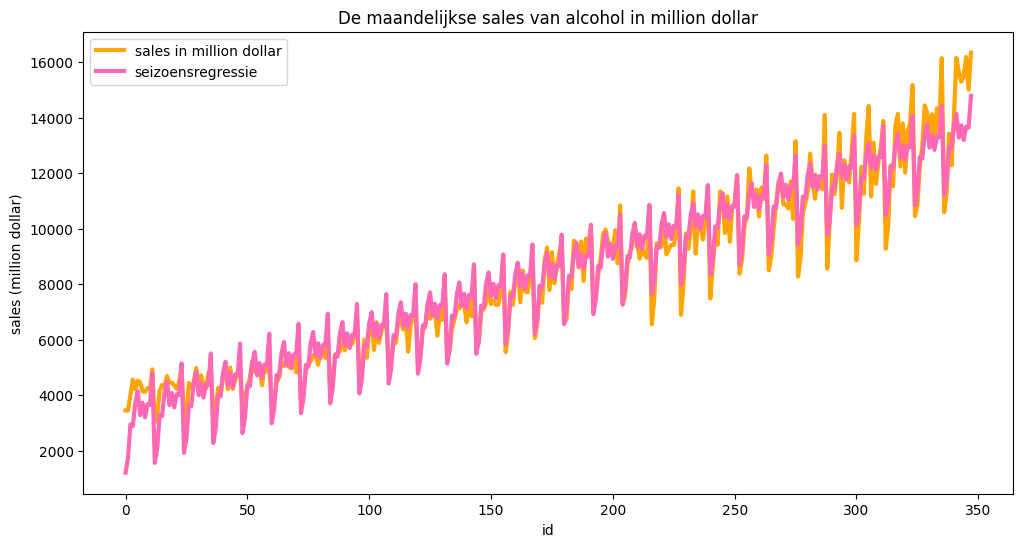

In [29]:
dataset['sales (million dollar)'].plot(color='orange', linewidth=3, figsize=(12,6))
dataset['seizoensregressie'].plot(color='hotpink', linewidth=3)
plt.legend(labels = ['sales in million dollar', 'seizoensregressie'])
plt.title("De maandelijkse sales van alcohol in million dollar")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[2])

## <span style="color:deeppink"> toerisme </span>
Deze dataset bevat het  het aantal overnachtingen (in hotel, gastenkamers, campings,…) in Vlaanderen tijdens een bepaalde maand van een bepaald jaar. Gedetailleerde info per provincie kan je trouwens vinden op https://www.toerismevlaanderen.be  
Laad de dataset `toerisme.csv` in, gebruik de eerste kolom Datum als index

In [30]:
dataset=pd.read_csv('toerisme.csv', index_col="Datum")
dataset.head()

,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen
Datum,,,,
januari 2014,2014,januari,0,1162818
februari 2014,2014,februari,1,1450616
maart 2014,2014,maart,2,1876276
april 2014,2014,april,3,2358104
mei 2014,2014,mei,4,2360854


Plot de grafiek van het aantal overnachtingen, bepaal de trend in de tijdsreeks & geef de vergelijking ervan.

<Axes: xlabel='Datum'>

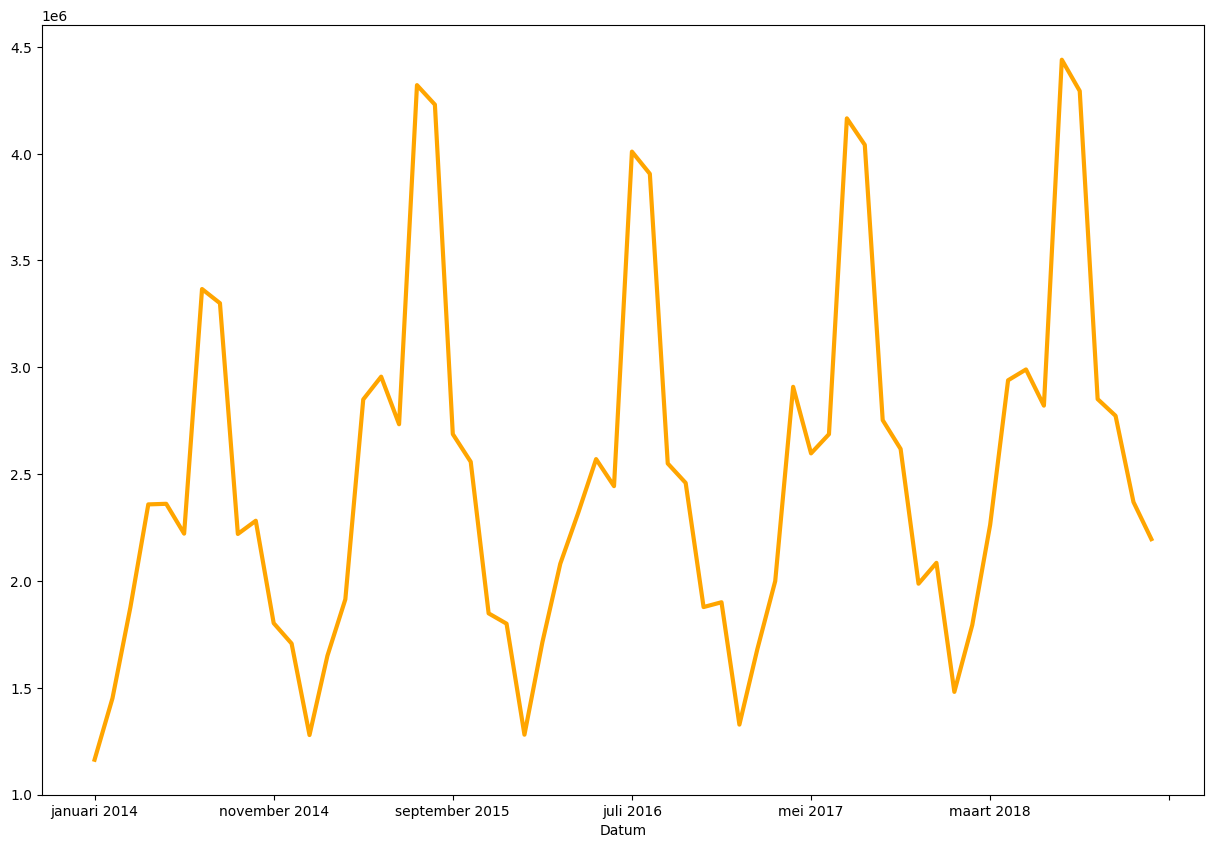

In [31]:
dataset['Aantal overnachtingen '].plot(color='orange', linewidth=3, figsize=(15,10))

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de optimale alfa kan vinden.
- Seizoensregressie

Welke techniek werkt het best bij deze dataset?  
Plot de echte waarde en de waarden van de voorspellingstechniek op dezelfde grafiek

In [33]:
x = dataset['Aantal maanden na januari 2014'].values
y = dataset['Aantal overnachtingen '].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])

Intercept = 2146433.168852459
Richtingscoëfficiënt =  12035.240038899694


<Axes: xlabel='Datum'>

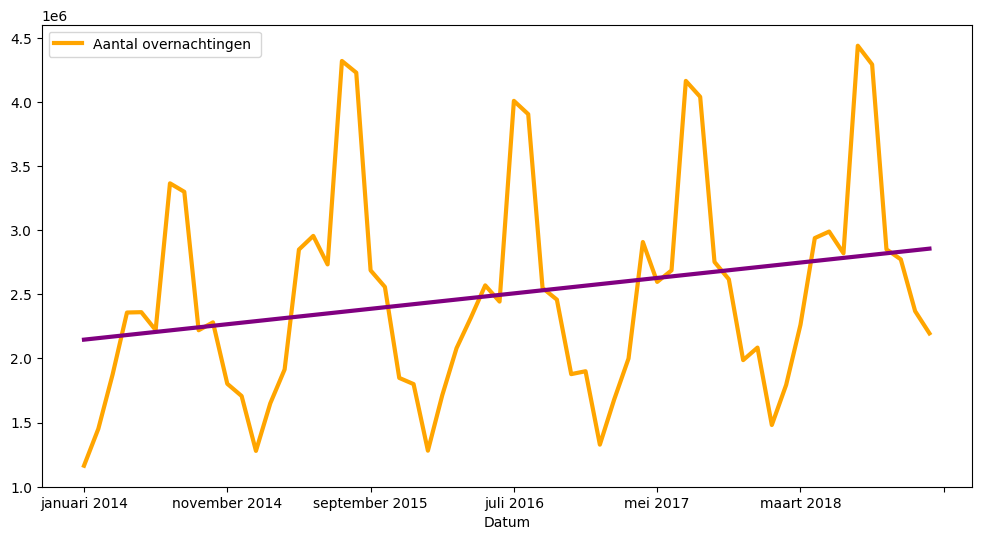

In [34]:
dataset['Aantal overnachtingen '].plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [35]:
dataset['trendlijn'] = regressionline.coef_[0]*dataset['Aantal maanden na januari 2014'] + regressionline.intercept_
dataset.head()

,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn
Datum,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06
februari 2014,2014,februari,1,1450616,2.158468e+06
maart 2014,2014,maart,2,1876276,2.170504e+06
april 2014,2014,april,3,2358104,2.182539e+06
mei 2014,2014,mei,4,2360854,2.194574e+06


In [36]:
dataset['residue'] = dataset['Aantal overnachtingen '] - dataset['trendlijn']
dataset.head()

,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue
Datum,,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06,-983615.168852
februari 2014,2014,februari,1,1450616,2.158468e+06,-707852.408891
maart 2014,2014,maart,2,1876276,2.170504e+06,-294227.648930
april 2014,2014,april,3,2358104,2.182539e+06,175565.111031
mei 2014,2014,mei,4,2360854,2.194574e+06,166279.870992


In [37]:
dataset['voorgaande waarde'] = dataset['residue'].shift(1)
dataset['fout voorgaande waarde'] = abs(dataset['residue']-dataset['voorgaande waarde'])
print("Mean absolute error voorgaande waarde: ", dataset['fout voorgaande waarde'].mean())
dataset.head()

Mean absolute error voorgaande waarde:  489335.81695244927


,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue,voorgaande waarde,fout voorgaande waarde
Datum,,,,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06,-983615.168852,NaN,NaN
februari 2014,2014,februari,1,1450616,2.158468e+06,-707852.408891,-983615.168852,275762.759961
maart 2014,2014,maart,2,1876276,2.170504e+06,-294227.648930,-707852.408891,413624.759961
april 2014,2014,april,3,2358104,2.182539e+06,175565.111031,-294227.648930,469792.759961
mei 2014,2014,mei,4,2360854,2.194574e+06,166279.870992,175565.111031,9285.240039


### **Wat deze code doet:**

---

1. **Voorgaande Waarde Toevoegen:**

   ```python
   dataset['voorgaande waarde'] = dataset['residue'].shift(1)
   ```

   * **Voegt** een nieuwe kolom toe met de **vorige residuwaarde**.
   * **.shift(1)** verschuift de residuen **1 rij naar beneden** om de **vorige waarde** te krijgen.

---

2. **Fout van de Voorgaande Waarde:**

   ```python
   dataset['fout voorgaande waarde'] = abs(dataset['residue'] - dataset['voorgaande waarde'])
   ```

   * **Bereken** de **absolute fout** tussen de huidige residuwaarde en de voorgaande residuwaarde.

---

3. **Gemiddelde Absolute Fout Printen:**

   ```python
   print("Mean absolute error voorgaande waarde: ", dataset['fout voorgaande waarde'].mean())
   ```

   * **Print** de gemiddelde absolute fout voor de voorgaande waarden.

---

4. **Dataset Bekijken:**

   ```python
   dataset.head()
   ```

   * **Toont** de eerste 5 rijen van het dataset om te controleren of de nieuwe kolommen correct zijn toegevoegd.

---

### **Kort samengevat:**

* **Voegt** de **vorige residuwaarde** toe.
* **Meet** de fout tussen de huidige en vorige residuwaarden.
* **Print** de gemiddelde fout. 😊


In [38]:
dataset['5MA'] = dataset['residue'].rolling(5).mean().shift(1)
dataset['fout 5MA'] = abs(dataset['residue']-dataset['5MA'])
print("Mean absolute error 5MA: ", dataset['fout 5MA'].mean())
dataset.head(7)

Mean absolute error 5MA:  882021.7403657582


,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue,voorgaande waarde,fout voorgaande waarde,5MA,fout 5MA
Datum,,,,,,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06,-9.836152e+05,NaN,NaN,NaN,NaN
februari 2014,2014,februari,1,1450616,2.158468e+06,-7.078524e+05,-983615.168852,2.757628e+05,NaN,NaN
maart 2014,2014,maart,2,1876276,2.170504e+06,-2.942276e+05,-707852.408891,4.136248e+05,NaN,NaN
april 2014,2014,april,3,2358104,2.182539e+06,1.755651e+05,-294227.648930,4.697928e+05,NaN,NaN
mei 2014,2014,mei,4,2360854,2.194574e+06,1.662799e+05,175565.111031,9.285240e+03,NaN,NaN
juni 2014,2014,juni,5,2221182,2.206609e+06,1.457263e+04,166279.870992,1.517072e+05,-328770.048930,3.433427e+05
juli 2014,2014,juli,6,3366208,2.218645e+06,1.147563e+06,14572.630953,1.132991e+06,-129132.488969,1.276696e+06


The lowest MAE is:  489098.8377728152
alpha:  0.982


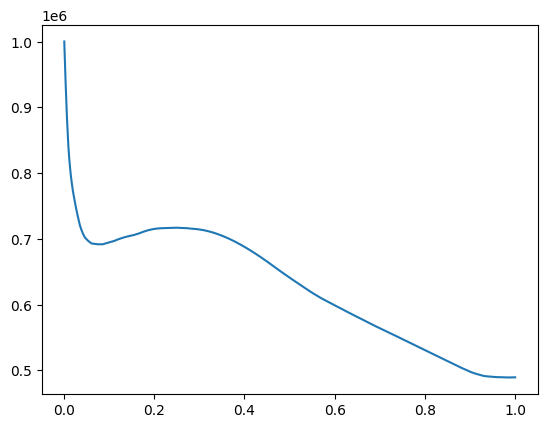

In [40]:
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
    exponential = []
    exponential = dataset['residue'].ewm(alpha=alpha, adjust=False).mean().shift(1)
    mae.append(abs(dataset['residue'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()
print("The lowest MAE is: ", minimum_mae)
print("alpha: ", df[df['mae'] == minimum_mae].index[0])
plt.plot(df['mae'])

In [41]:
dataset['exponentiele demping'] = dataset['residue'].ewm(alpha=0.982, adjust=False).mean().shift(1)
dataset['absolute fout exponentiele demping'] = abs(dataset['residue'] - dataset['exponentiele demping'])
print("De mean absolute error is: ", round(dataset['absolute fout exponentiele demping'].mean(),2))
dataset.head()

De mean absolute error is:  489098.84


,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue,voorgaande waarde,fout voorgaande waarde,5MA,fout 5MA,exponentiele demping,absolute fout exponentiele demping
Datum,,,,,,,,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06,-983615.168852,NaN,NaN,NaN,NaN,NaN,NaN
februari 2014,2014,februari,1,1450616,2.158468e+06,-707852.408891,-983615.168852,275762.759961,NaN,NaN,-983615.168852,275762.759961
maart 2014,2014,maart,2,1876276,2.170504e+06,-294227.648930,-707852.408891,413624.759961,NaN,NaN,-712816.138571,418588.489640
april 2014,2014,april,3,2358104,2.182539e+06,175565.111031,-294227.648930,469792.759961,NaN,NaN,-301762.241744,477327.352775
mei 2014,2014,mei,4,2360854,2.194574e+06,166279.870992,175565.111031,9285.240039,NaN,NaN,166973.218681,693.347689


### **Wat deze code doet:**

---

1. **5-Punts Voortschrijdend Gemiddelde Berekenen:**

   ```python
   dataset['5MA'] = dataset['residue'].rolling(5).mean().shift(1)
   dataset['fout 5MA'] = abs(dataset['residue'] - dataset['5MA'])
   print("Mean absolute error 5MA: ", dataset['fout 5MA'].mean())
   ```

   * **Bereken** een **5MA** (voortschrijdend gemiddelde) over **5** waarden van de **residuen**.
   * **Meet** de **absolute fout** tussen de residuen en de 5MA.
   * **Print** de gemiddelde fout (MAE) van deze methode.

---

2. **Optimale Alpha Vinden voor Exponentiële Demping:**

   ```python
   step = 1e-3
   alphas = np.arange(start=0, stop=1+step, step=step)
   df = pd.DataFrame()
   mae = []
   for alpha in alphas[1:]:
       exponential = dataset['residue'].ewm(alpha=alpha, adjust=False).mean().shift(1)
       mae.append(abs(dataset['residue'] - exponential).mean())
   df['mae'] = mae
   df.set_index(alphas[1:], inplace=True)
   df.index.name = 'Alpha'
   ```

   * **Maak** een lijst met alpha-waarden van **0.001** tot **1.0**.
   * **Test** elke alpha om de exponentiële demping van de residuen te berekenen.
   * **Meet** de **MAE** voor elke alpha en sla die op in een DataFrame.

---

3. **Beste Alpha Printen:**

   ```python
   minimum_mae = df['mae'].min()
   print("The lowest MAE is: ", minimum_mae)
   print("alpha: ", df[df['mae'] == minimum_mae].index[0])
   plt.plot(df['mae'])
   ```

   * **Vind** de alpha met de **laagste MAE** en **print** die.
   * **Visualiseer** de MAE voor elke alpha om het **optimale punt** te zien.

---

4. **Exponentiële Demping met Beste Alpha:**

   ```python
   dataset['exponentiele demping'] = dataset['residue'].ewm(alpha=0.982, adjust=False).mean().shift(1)
   dataset['absolute fout exponentiele demping'] = abs(dataset['residue'] - dataset['exponentiele demping'])
   print("De mean absolute error is: ", round(dataset['absolute fout exponentiele demping'].mean(),2))
   dataset.head()
   ```

   * **Voegt** een kolom toe met de **exponentiële demping** met de **optimale alpha (0.982)**.
   * **Bereken** de **absolute fout** voor deze demping en **print** de gemiddelde fout.
   * **Toont** de eerste 5 rijen van het dataset om de nieuwe kolommen te controleren.

---

### **Kort samengevat:**

* **Bereken** een **5MA** voor de residuen.
* **Vind** de beste alpha voor **exponentiële demping**.
* **Voegt** beide methoden toe aan het dataset en **print** de gemiddelde fouten. 😊


In [42]:
df = dataset.groupby(['Maand']).mean()
df

,Jaar,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue,voorgaande waarde,fout voorgaande waarde,5MA,fout 5MA,exponentiele demping,absolute fout exponentiele demping
Maand,,,,,,,,,,,
april,2016.0,27.0,2674670.0,2.471385e+06,2.032854e+05,-4.329338e+05,6.362192e+05,-734388.920019,9.446043e+05,-4.394725e+05,6.427579e+05
augustus,2016.0,31.0,3953957.2,2.519526e+06,1.434432e+06,1.552841e+06,1.184090e+05,324014.470058,1.110417e+06,1.526470e+06,9.203889e+04
december,2016.0,35.0,1937250.6,2.567667e+06,-6.304160e+05,-5.789097e+05,8.992645e+04,496581.069903,1.126997e+06,-5.685608e+05,9.141703e+04
februari,2016.0,25.0,1657083.6,2.447314e+06,-7.902306e+05,-1.129491e+06,3.392600e+05,-458619.089942,3.522060e+05,-1.121661e+06,3.314301e+05
januari,2016.0,24.0,1305788.4,2.435279e+06,-1.129491e+06,-6.227376e+05,5.432217e+05,58932.200097,1.224892e+06,-6.222160e+05,5.437434e+05
juli,2016.0,30.0,4060331.0,2.507490e+06,1.552841e+06,8.557567e+04,1.467265e+06,-144599.769903,1.697440e+06,8.783244e+04,1.465008e+06
juni,2016.0,29.0,2581030.8,2.495455e+06,8.557567e+04,2.113045e+05,1.568327e+05,-387613.009864,4.731887e+05,2.109519e+05,1.542680e+05
maart,2016.0,26.0,2026415.6,2.459349e+06,-4.329338e+05,-7.902306e+05,3.572968e+05,-639378.029981,1.717677e+05,-7.961963e+05,3.632625e+05
mei,2016.0,28.0,2694724.4,2.483420e+06,2.113045e+05,2.032854e+05,1.411326e+05,-571383.410058,7.939441e+05,1.917157e+05,1.427647e+05


In [44]:
seizoensregressie = []
for i in dataset.index.values:
    maand = dataset.loc[i,'Maand']
    gemiddelde = df.loc[maand,'residue']
    waarde = dataset.loc[i, 'trendlijn']+gemiddelde
    seizoensregressie.append(waarde)
dataset['seizoensregressie'] = seizoensregressie
dataset.head()

,Jaar,Maand,Aantal maanden na januari 2014,Aantal overnachtingen,trendlijn,residue,voorgaande waarde,fout voorgaande waarde,5MA,fout 5MA,exponentiele demping,absolute fout exponentiele demping,seizoensregressie
Datum,,,,,,,,,,,,,
januari 2014,2014,januari,0,1162818,2.146433e+06,-983615.168852,NaN,NaN,NaN,NaN,NaN,NaN,1.016943e+06
februari 2014,2014,februari,1,1450616,2.158468e+06,-707852.408891,-983615.168852,275762.759961,NaN,NaN,-983615.168852,275762.759961,1.368238e+06
maart 2014,2014,maart,2,1876276,2.170504e+06,-294227.648930,-707852.408891,413624.759961,NaN,NaN,-712816.138571,418588.489640,1.737570e+06
april 2014,2014,april,3,2358104,2.182539e+06,175565.111031,-294227.648930,469792.759961,NaN,NaN,-301762.241744,477327.352775,2.385824e+06
mei 2014,2014,mei,4,2360854,2.194574e+06,166279.870992,175565.111031,9285.240039,NaN,NaN,166973.218681,693.347689,2.405879e+06


In [45]:
dataset['absolute fout seizoensregressie'] = abs(dataset['residue'] - dataset['seizoensregressie'])
print("De mean absolute error is: ", round(dataset['absolute fout seizoensregressie'].mean(),2))

De mean absolute error is:  2501472.75


In [46]:
dataset['voorspelling MA'] = dataset['trendlijn'] + dataset['5MA']
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']

Text(0, 0.5, 'Aantal overnachtingen ')

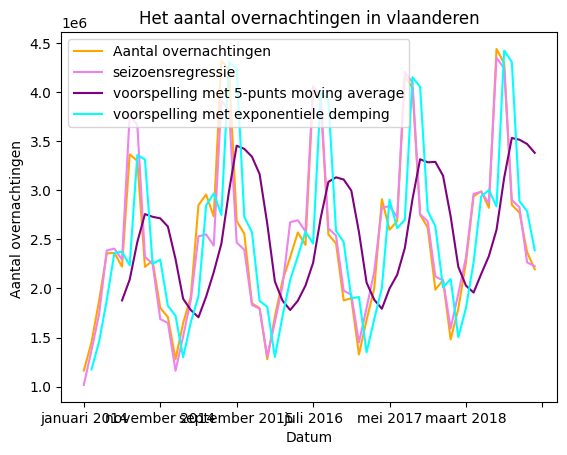

In [47]:
dataset['Aantal overnachtingen '].plot(color='orange')
dataset['seizoensregressie'].plot(color='violet')
dataset['voorspelling MA'].plot(color='purple')
dataset['voorspelling exponentiele demping'].plot(color='cyan')
plt.legend(labels=['Aantal overnachtingen', 'seizoensregressie', 'voorspelling met 5-punts moving average', 'voorspelling met exponentiele demping'])
plt.title("Het aantal overnachtingen in vlaanderen")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[3])

### **Wat deze code doet:**

---

1. **Seizoensregressie Berekenen:**

   ```python
   seizoensregressie = []
   for i in dataset.index.values:
       maand = dataset.loc[i,'Maand']
       gemiddelde = df.loc[maand,'residue']
       waarde = dataset.loc[i, 'trendlijn'] + gemiddelde
       seizoensregressie.append(waarde)
   dataset['seizoensregressie'] = seizoensregressie
   ```

   * **Bereken** de **seizoensregressie** voor elke rij.
   * **Combineert** de **trendlijn** met het **seizoensgemiddelde** voor de huidige maand.
   * **Voegt** deze waarden toe als een nieuwe kolom **'seizoensregressie'**.

---

2. **Absolute Fout voor Seizoensregressie:**

   ```python
   dataset['absolute fout seizoensregressie'] = abs(dataset['residue'] - dataset['seizoensregressie'])
   print("De mean absolute error is: ", round(dataset['absolute fout seizoensregressie'].mean(),2))
   ```

   * **Meet** de **absolute fout** tussen de **werkelijke residuen** en de **seizoensregressie**.
   * **Print** de gemiddelde absolute fout.

---

3. **Voorspellingen Toevoegen:**

   ```python
   dataset['voorspelling MA'] = dataset['trendlijn'] + dataset['5MA']
   dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']
   ```

   * **Combineert** de **trendlijn** met de **5MA** en de **exponentiële demping** om voorspellingen te maken.

---

4. **Visualiseren van Voorspellingen:**

   ```python
   dataset['Aantal overnachtingen '].plot(color='orange')
   dataset['seizoensregressie'].plot(color='violet')
   dataset['voorspelling MA'].plot(color='purple')
   dataset['voorspelling exponentiele demping'].plot(color='cyan')
   ```

   * **Plot** de originele data (aantal overnachtingen) en de verschillende voorspellingen.

---

5. **Grafiek Instellen:**

   ```python
   plt.legend(labels=['Aantal overnachtingen', 'seizoensregressie', 'voorspelling met 5-punts moving average', 'voorspelling met exponentiele demping'])
   plt.title("Het aantal overnachtingen in Vlaanderen")
   plt.xlabel(dataset.index.name)
   plt.ylabel(dataset.columns[3])
   ```

   * **Voegt** een **titel** en **labels** toe aan de grafiek.
   * **Stelt** de x-as in op de **indexnaam** en de y-as op de **kolomnaam** van de **3e kolom** (aantal overnachtingen).

---

### **Kort samengevat:**

* **Voegt** seizoensregressie en voorspellingen toe aan de dataset.
* **Plot** de originele waarden en verschillende voorspellingen.
* **Labelt** de grafiek voor duidelijkheid. 😊
